In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import LeaveOneOut
import matplotlib
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## Wine data

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

n_estimators = 10 -> train_accuracy: 0.8837209302325582
n_estimators = 10 -> valid_accuracy: 1.0
n_estimators = 10 -> test_accuracy: 0.9444444444444444


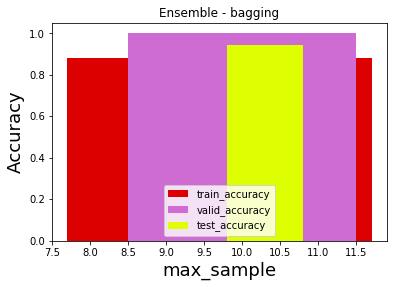

In [46]:
x_train1,x_valid,y_train1,y_valid=train_test_split(x_train,y_train,test_size=0.1)

x=[10]
y=[20]

# max_samples = 10
wine_bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

wine_bagging.fit(x_train1,y_train1)
wine_bagging.fit(x_valid,y_valid)
wine_bagging.predict(x_test)

train_accuracy=wine_bagging.score(x_train1,y_train1)
valid_accuracy=wine_bagging.score(x_valid,y_valid)
test_accuracy=wine_bagging.score(x_test,y_test)

plt.bar(x[0]-0.3,train_accuracy,width=4,color='#dd0000')
plt.bar(x[0],valid_accuracy,width=3,color='#ce6cd4')
plt.bar(x[0]+0.3,test_accuracy,width=1,color='#ddff00')

print("n_estimators = 10 -> train_accuracy:",train_accuracy)
print("n_estimators = 10 -> valid_accuracy:",valid_accuracy)
print("n_estimators = 10 -> test_accuracy:",test_accuracy)



plt.title('Ensemble - bagging')
plt.legend(['train_accuracy','valid_accuracy','test_accuracy'],loc='lower center')

plt.xlabel('max_sample',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()


 test_accuracy: 1.0
kfold.mean :  0.9642857142857144
loo.mean :  0.9583333333333334


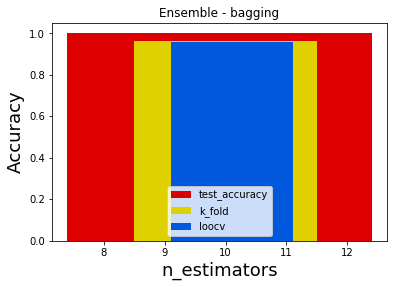

In [47]:

x=[10]
y=[100]

# max_samples = 50
wine_bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=50,bootstrap=True,n_jobs=-1)
wine_bagging.fit(x_train,y_train)
wine_bagging.predict(x_test)

train_accuracy=wine_bagging.score(x_train,y_train)
test_accuracy=wine_bagging.score(x_test,y_test)
score_kfold=cross_val_score(wine_bagging,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(wine_bagging,x_train,y_train,cv=loo)

plt.bar(x[0]-0.1,test_accuracy,width=5,color='#dd0000')
plt.bar(x[0],score_kfold.mean(),width=3,color='#dfd000')
plt.bar(x[0]+0.1,score_loo.mean(),width=2,color='#0058dd')


print(" test_accuracy:",test_accuracy)
print("kfold.mean : ",score_kfold.mean())
print("loo.mean : ",score_loo.mean())




plt.title('Ensemble - bagging')
plt.legend(['test_accuracy','k_fold','loocv'],loc='lower center')

plt.xlabel('n_estimators',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()
